# UCS Machine learning prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the raw dataset to inspect the structure
raw_data_path = "projectdata.csv"
initial_data = pd.read_csv(raw_data_path)

In [ ]:
# Preview the first few rows of the raw dataset
print("Initial Rows of Raw Dataset:")
print(initial_data.head(10))


In [ ]:
# Reload dataset using appropriate header row (index 6 as header)
processed_data = pd.read_csv(raw_data_path, header=6)
processed_data.head(10)

In [ ]:
# Show basic info to confirm data types and null values
print("Dataset Structure and Info:")
print(processed_data.info())


In [ ]:
# Load the dataset
file_path = "projectdata.csv"
data = pd.read_csv(file_path)

In [ ]:
# Display the first 10 rows of the dataset to see the whole data
print("Dataset Head:")
print(data.head(10))

Dataset Head:
     BASIN        XXX   Unnamed: 2      Unnamed: 3     Unnamed: 4
0    FIELD        YYY          NaN             NaN            NaN
1  COMPANY        ZZZ          NaN             NaN            NaN
2     WELL         X2          NaN             NaN            NaN
3      NaN        NaN          NaN             NaN            NaN
4       FT          -          Mpa             Mpa            Mpa
5    Depth  Lithology          UCS  Overburden_MPA  Pore Pressure
6        1  Sandstone  1.286779561     9.885754063    6.201995409
7        2  Sandstone  1.286994385     9.898487001    6.209902054
8        3  Sandstone  1.287209243     9.908001914    6.215789664
9        4  Sandstone  1.287424134     9.916776051    6.221212403


In [ ]:
# Load the dataset again to use index 6 as header and display data set again since we have identified index 6 to be the header
file_path = "projectdata.csv"
data = pd.read_csv(file_path, header=6)
data.head(10)

,Depth,Lithology,UCS,Overburden_MPA,Pore Pressure
0,1,Sandstone,1.286780,9.885754,6.201995
1,2,Sandstone,1.286994,9.898487,6.209902
2,3,Sandstone,1.287209,9.908002,6.215790
3,4,Sandstone,1.287424,9.916776,6.221212
4,5,Sandstone,1.287639,9.925147,6.226382
5,6,Sandstone,1.287854,9.933238,6.231376
6,7,Sandstone,1.288069,9.941128,6.236244
7,8,Sandstone,1.288284,9.948865,6.241016
8,9,Sandstone,1.288499,9.956467,6.245702
9,10,Sandstone,1.288714,9.963969,6.250326


In [ ]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Depth           18423 non-null  int64  
 1   Lithology       18423 non-null  object 
 2   UCS             18423 non-null  float64
 3   Overburden_MPA  18423 non-null  float64
 4   Pore Pressure   18423 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 719.8+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Depth             0
Lithology         0
UCS               0
Overburden_MPA    0
Pore Pressure     0
dtype: int64


## Conversion to equivalent density
### Conversion of overburden stress from MPa to psi
**1 MPa = 145.038 psi**  
   Use this factor to convert overburden stress from MPa to psi:
   $$
   \text{Overburden Stress (psi)} = \text{Overburden Stress (MPa)} \times 145.038
   $$

### Density Formula
Rewriting the formula for density using overburden stress in MPa:
$$
\text{Density (g/cm}^3\text{)} = \frac{\text{Overburden Stress (psi)}}{0.052 \times \text{Depth (ft)} \times 8.35}
$$
Substitute the conversion for overburden stress:
$$
\text{Density (g/cm}^3\text{)} = \frac{\text{Overburden Stress (MPa)} \times 145.038}{0.052 \times \text{Depth (ft)} \times 8.35}
$$

In [ ]:
# Calculate Density (g/cm^3) from Overburden Stress (MPa)

if 'Overburden_MPA' in data.columns and 'Depth' in data.columns:
    # Conversion factors
    psi_per_mpa = 145.038  # 1 MPa = 145.038 psi

    # Convert Overburden Pressure to psi
    data['Overburden_PSI'] = data['Overburden_MPA'] * psi_per_mpa

    # Calculate Density in ppg
    data['Density_g/cm^3'] = data['Overburden_PSI'] / (0.052 * data['Depth'] * 8.35)

    print("\nDensity calculated and added to the dataset.")
else:
    print("\nRequired columns ('Overburden Pressure (MPa)' and 'Depth (ft)') are missing!")

# Display updated dataset
print("\nUpdated Dataset Head:")
print(data.head(10))

# Save cleaned dataset for later use
data.to_csv("cleaned_projectdata_with_density_gcm3.csv", index=False)
print("\nCleaned dataset with density in g/cm^3 saved as 'cleaned_projectdata_with_density_gcm3.csv'.")



Required columns ('Overburden Pressure (MPa)' and 'Depth (ft)') are missing!

Updated Dataset Head:
   Pore Pressure   Density  lithology       UCS
0       6.201995  3.145183          1  1.286780
1       6.209902  3.145183          1  1.286994
2       6.215790  3.145183          1  1.287209
3       6.221212  3.145183          1  1.287424
4       6.226382  3.145183          1  1.287639
5       6.231376  3.145183          1  1.287854
6       6.236244  3.145183          1  1.288069
7       6.241016  3.145183          1  1.288284
8       6.245702  3.145183          1  1.288499
9       6.250326  3.145183          1  1.288714

Cleaned dataset with density in g/cm^3 saved as 'cleaned_projectdata_with_density_gcm3.csv'.


In [ ]:
data.head()

,Depth,Lithology,UCS,Overburden_MPA,Pore Pressure,Overburden_PSI,Density_g/cm^3
0,1,Sandstone,1.286780,9.885754,6.201995,1433.809998,3302.187927
1,2,Sandstone,1.286994,9.898487,6.209902,1435.656758,1653.220587
2,3,Sandstone,1.287209,9.908002,6.215790,1437.036782,1103.206496
3,4,Sandstone,1.287424,9.916776,6.221212,1438.309365,828.137589
4,5,Sandstone,1.287639,9.925147,6.226382,1439.523442,663.069296


## Changing our Lithology from a string to integer

Here we can use the standard scaler to standardize our categorical data to hot code it, however using the technique taught in class we will use the map method to create a new column in our data to convert our categorical lithology to numerical. As .map() is generally better for simple categorical-to-numerical conversions.

In [ ]:
#Display our categorical data names
data['Lithology'].unique()

array(['Sandstone', 'Shale'], dtype=object)

In [ ]:
#convert categorical data to numerical
data['Lithology_Num'] = data['Lithology'].map({'Sandstone': 1, 'Shale': 0}).astype('int64')

In [ ]:
data.head(10)

,Depth,Lithology,UCS,Overburden_MPA,Pore Pressure,Overburden_PSI,Density_g/cm^3,Lithology_Num
0,1,Sandstone,1.286780,9.885754,6.201995,1433.809998,3302.187927,1
1,2,Sandstone,1.286994,9.898487,6.209902,1435.656758,1653.220587,1
2,3,Sandstone,1.287209,9.908002,6.215790,1437.036782,1103.206496,1
3,4,Sandstone,1.287424,9.916776,6.221212,1438.309365,828.137589,1
4,5,Sandstone,1.287639,9.925147,6.226382,1439.523442,663.069296,1
5,6,Sandstone,1.287854,9.933238,6.231376,1440.696993,553.008212,1
6,7,Sandstone,1.288069,9.941128,6.236244,1441.841388,474.383559,1
7,8,Sandstone,1.288284,9.948865,6.241016,1442.963545,415.408667,1
8,9,Sandstone,1.288499,9.956467,6.245702,1444.066031,369.534273,1
9,10,Sandstone,1.288714,9.963969,6.250326,1445.154125,332.831443,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Depth           18423 non-null  int64  
 1   Lithology       18423 non-null  object 
 2   UCS             18423 non-null  float64
 3   Overburden_MPA  18423 non-null  float64
 4   Pore Pressure   18423 non-null  float64
 5   Overburden_PSI  18423 non-null  float64
 6   Density_g/cm^3  18423 non-null  float64
 7   Lithology_Num   18423 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
#creating a dictionary to create a new data frame for our training
# let "data_UCS" be the variable name for the list of UCS
# let "data_Pore_Pressure" be the variable name for the list of all data points for pore pressure
# let "data_Density" be the variable name for the list of all data points Density in Kg/m^3
# let "data_Lithology" be the variable name for the list of all data points for converted lithology

data_UCS = data.loc[:,'UCS']
data_Pore_Pressure= data.loc[:,'Pore Pressure']
data_Density = data.loc[:,'Density_g/cm^3']
data_Lithology =  data.loc[:,'Lithology_Num']

## Reviewing if our variable list is okay

In [ ]:
data_UCS.head()

0    1.286780
1    1.286994
2    1.287209
3    1.287424
4    1.287639
Name: UCS, dtype: float64

In [ ]:
data_Pore_Pressure.head()

0    6.201995
1    6.209902
2    6.215790
3    6.221212
4    6.226382
Name: Pore Pressure, dtype: float64

In [ ]:
data_Density.head()

0    3302.187927
1    1653.220587
2    1103.206496
3     828.137589
4     663.069296
Name: Density_g/cm^3, dtype: float64

In [ ]:
data_Lithology.head()

0    1
1    1
2    1
3    1
4    1
Name: Lithology_Num, dtype: int64

In [ ]:
# Create a dictionary with new Training_data

Training_data = {
    'Pore Pressure': data_Pore_Pressure ,
    'Density': data_Density,
    'lithology':data_Lithology,
    'UCS' : data_UCS
}

In [ ]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(Training_data)

# Save the new file for prediction
filename = 'predictiondata.csv'

# Write the DataFrame to a CSV file
df.to_csv(filename, index=False)  # index=False to avoid writing row indices

data = pd.read_csv('predictiondata.csv')

data.head(10)

,Pore Pressure,Density,lithology,UCS
0,6.201995,3302.187927,1,1.286780
1,6.209902,1653.220587,1,1.286994
2,6.215790,1103.206496,1,1.287209
3,6.221212,828.137589,1,1.287424
4,6.226382,663.069296,1,1.287639
5,6.231376,553.008212,1,1.287854
6,6.236244,474.383559,1,1.288069
7,6.241016,415.408667,1,1.288284
8,6.245702,369.534273,1,1.288499
9,6.250326,332.831443,1,1.288714


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pore Pressure  18423 non-null  float64
 1   Density        18423 non-null  float64
 2   lithology      18423 non-null  int64  
 3   UCS            18423 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 575.8 KB


In [ ]:
data.describe()

,Pore Pressure,Density,lithology,UCS
count,18423.000000,18423.000000,18423.000000,18423.000000
mean,45.003512,4.187432,0.685448,6.829961
std,24.569314,31.132509,0.464350,4.897675
min,6.201995,2.119318,0.000000,1.286780
25%,23.607290,2.701186,0.000000,2.710055
50%,42.939994,2.766484,1.000000,5.406070
75%,64.773702,2.878785,1.000000,9.958500
max,96.004957,3302.187927,1.000000,60.109894


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Pore Pressure    0
Density          0
lithology        0
UCS              0
dtype: int64


## Data Visualization To Gain Insights
To visualize the data and identify potential outliers, we can use the following approaches:

Box Plot: Displays the distribution of the data and highlights outliers.

Histogram: Shows the frequency distribution of the values in a column.
Scatter Plot: Allows us to see how features relate to each other and whether there are extreme values.

Correlation Heatmap: Provides an overview of relationships between variables.

Let’s start by plotting box plots for Density and UCS to check for outliers.

In [ ]:
#import necessary libaries
import matplotlib.pyplot as plt
import seaborn as sns

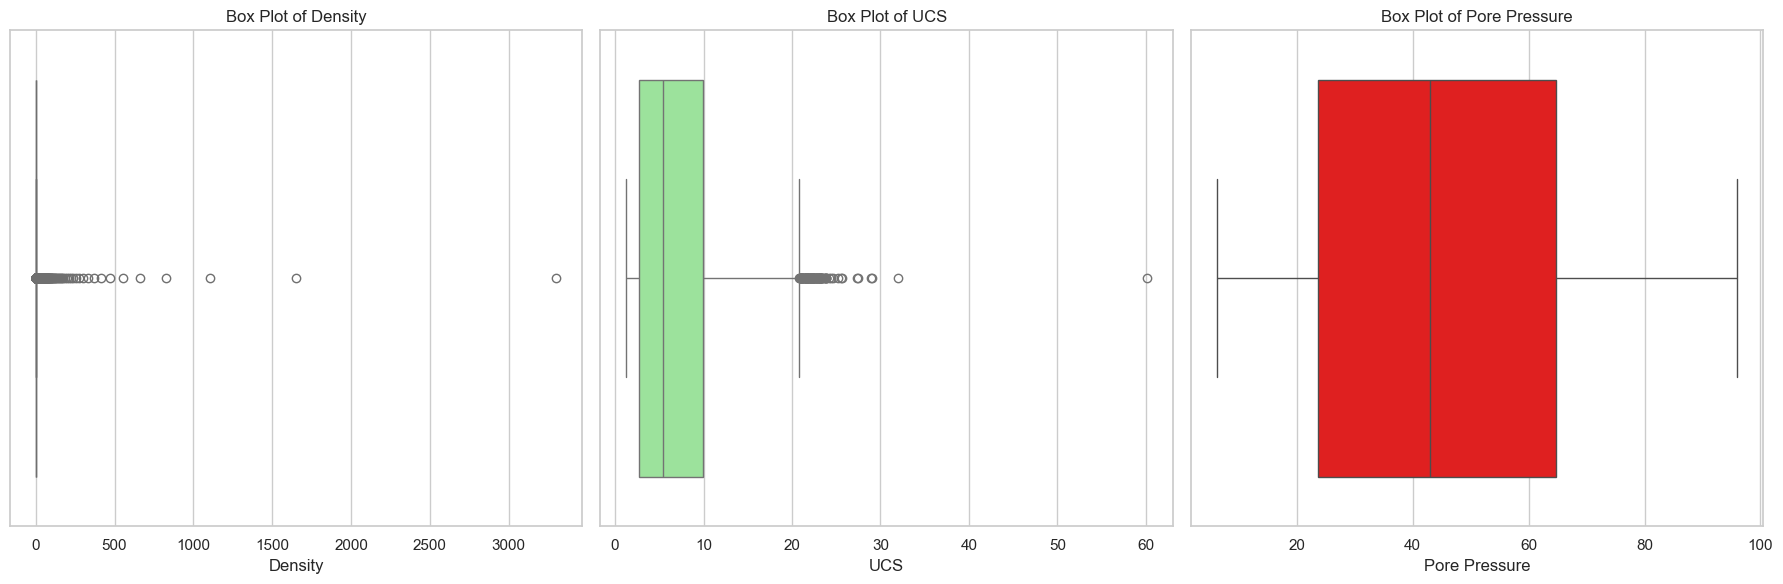

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with subplots for box plots of Density, UCS, and Pore Pressure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Density
sns.boxplot(data=data, x="Density", ax=axes[0], color="skyblue")
axes[0].set_title("Box Plot of Density")
axes[0].set_xlabel("Density")

# Box plot for UCS
sns.boxplot(data=data, x="UCS", ax=axes[1], color="lightgreen")
axes[1].set_title("Box Plot of UCS")
axes[1].set_xlabel("UCS")

# Box plot for Pore Pressure
sns.boxplot(data=data, x="Pore Pressure", ax=axes[2], color="red")
axes[2].set_title("Box Plot of Pore Pressure")
axes[2].set_xlabel("Pore Pressure")

# Show the plots
plt.tight_layout()
plt.show()

## Insights from the Box Plots:
**Density:**

The box plot shows a large number of extreme outliers, with values far exceeding the interquartile range (IQR).
The distribution of density is heavily left-skewed due to these outliers, which could affect model performance if not addressed.
Most of the data is concentrated around lower density values, while a few entries significantly deviate.

**UCS (Unconfined Compressive Strength):**

There are fewer outliers in the UCS column compared to Density, and they occur only on the higher end of the values.
The majority of the UCS data lies within a well-defined range, suggesting it may require minimal adjustment.
UCS appears less skewed than Density.

**Pore Pressure:**

The distribution of Pore Pressure exhibits fewer outliers than Density, but a few high-pressure values are beyond the whiskers of the box plot.
Most of the data points are concentrated in a relatively narrow range, indicating a stable distribution overall.

**General Observations:**
Outliers in Density are a significant issue and should be handled (e.g., capping, removing, or transforming).
UCS and Pore Pressure appear more manageable in terms of outliers, but transformations might still improve model performance.
Normalization or scaling may be necessary for all features due to differences in their scales.

**Our Decision:**
we use the capping method

Min: 2.12

Max: 3302.19 (very large outlier)

Q1 (25th percentile): 2.70

Q3 (75th percentile): 2.88

Median (50th percentile): 2.77

Mean: 4.19 (higher than the median, suggesting right skew)

Standard Deviation: 31.13 (indicating extreme values)


Extreme Outlier Effect: The max value (3302.19) is much larger than the rest. The IQR method likely computed a very low upper bound, causing most values to be capped.

Narrow IQR Range: The IQR = 2.88 − 2.70 = 0.18

so:


Upper Bound=2.88+(1.5×0.18)=3.15

Lower Bound=2.70−(1.5×0.18)=2.43

Any value above 3.15 was capped to 3.15.

In [ ]:
data = pd.read_csv('predictiondata.csv')

In [ ]:
data.head()

,Pore Pressure,Density,lithology,UCS
0,6.201995,3302.187927,1,1.286780
1,6.209902,1653.220587,1,1.286994
2,6.215790,1103.206496,1,1.287209
3,6.221212,828.137589,1,1.287424
4,6.226382,663.069296,1,1.287639


In [ ]:
# Function to cap outliers based on IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = float(Q1 - 1.5 * IQR)
    upper_bound = float(Q3 + 1.5 * IQR)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return lower_bound, upper_bound

# Apply capping to the specified columns
density_bounds = cap_outliers(data, "Density")
ucs_bounds = cap_outliers(data, "UCS")
pore_pressure_bounds = cap_outliers(data, "Pore Pressure")

# Print the bounds applied for reference
print(f"Density bounds: {density_bounds}")
print(f"UCS bounds: {ucs_bounds}")
print(f"Pore Pressure bounds: {pore_pressure_bounds}")

# Save the adjusted dataset to a new CSV file
data.to_csv('capped_data.csv', index=False)

Density bounds: (2.434787522097094, 3.145182810771599)
UCS bounds: (-8.162612517750002, 20.83116770825)
Pore Pressure bounds: (-38.14232927749999, 126.52332142249999)


### Import new capped data set and visualize again

In [ ]:
#import new capped data
data=pd.read_csv('capped_data.csv')

In [ ]:
data.head(10)

,Pore Pressure,Density,lithology,UCS
0,6.201995,3.145183,1,1.286780
1,6.209902,3.145183,1,1.286994
2,6.215790,3.145183,1,1.287209
3,6.221212,3.145183,1,1.287424
4,6.226382,3.145183,1,1.287639
5,6.231376,3.145183,1,1.287854
6,6.236244,3.145183,1,1.288069
7,6.241016,3.145183,1,1.288284
8,6.245702,3.145183,1,1.288499
9,6.250326,3.145183,1,1.288714


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pore Pressure  18423 non-null  float64
 1   Density        18423 non-null  float64
 2   lithology      18423 non-null  int64  
 3   UCS            18423 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 575.8 KB


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Pore Pressure    0
Density          0
lithology        0
UCS              0
dtype: int64


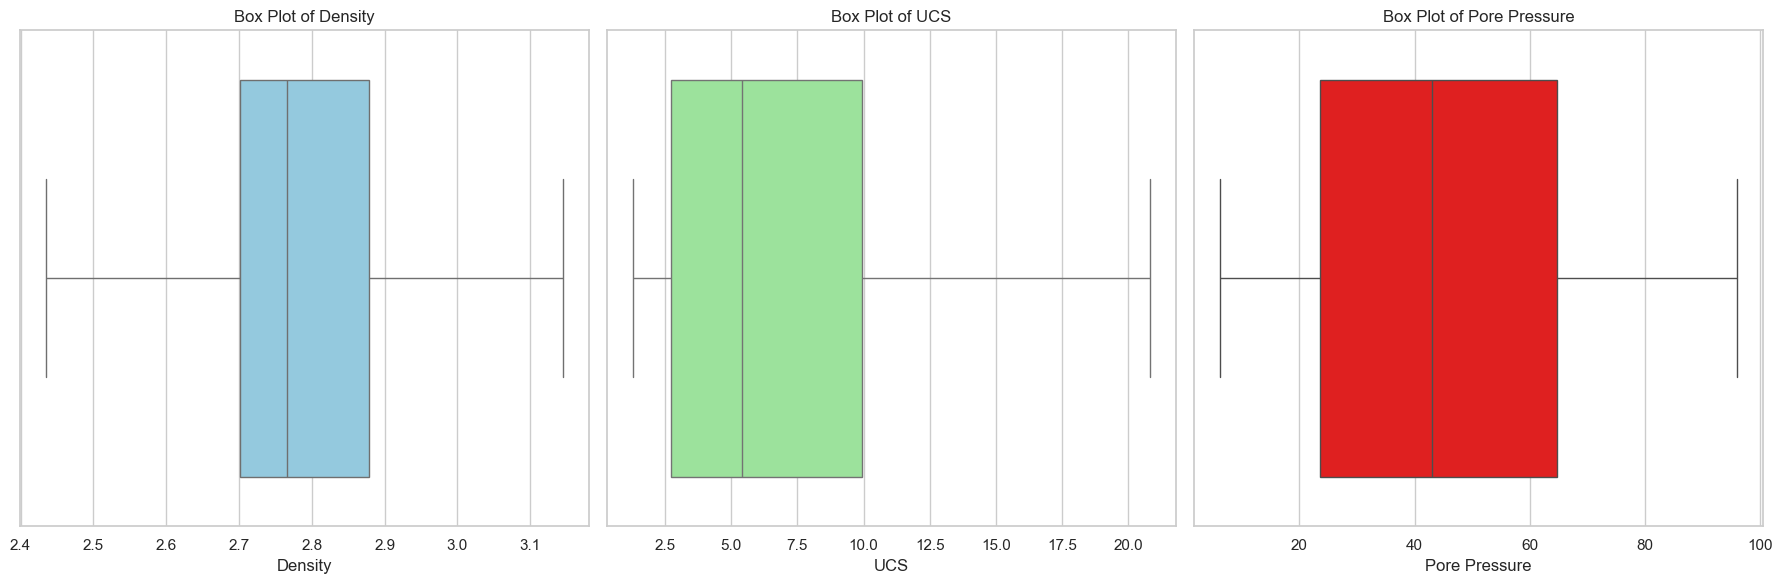

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with subplots for box plots of Density, UCS, and Pore Pressure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Density
sns.boxplot(data=data, x="Density", ax=axes[0], color="skyblue")
axes[0].set_title("Box Plot of Density")
axes[0].set_xlabel("Density")

# Box plot for UCS
sns.boxplot(data=data, x="UCS", ax=axes[1], color="lightgreen")
axes[1].set_title("Box Plot of UCS")
axes[1].set_xlabel("UCS")

# Box plot for Pore Pressure
sns.boxplot(data=data, x="Pore Pressure", ax=axes[2], color="red")
axes[2].set_title("Box Plot of Pore Pressure")
axes[2].set_xlabel("Pore Pressure")

# Show the plots
plt.tight_layout()
plt.show()

### Plotting histogram

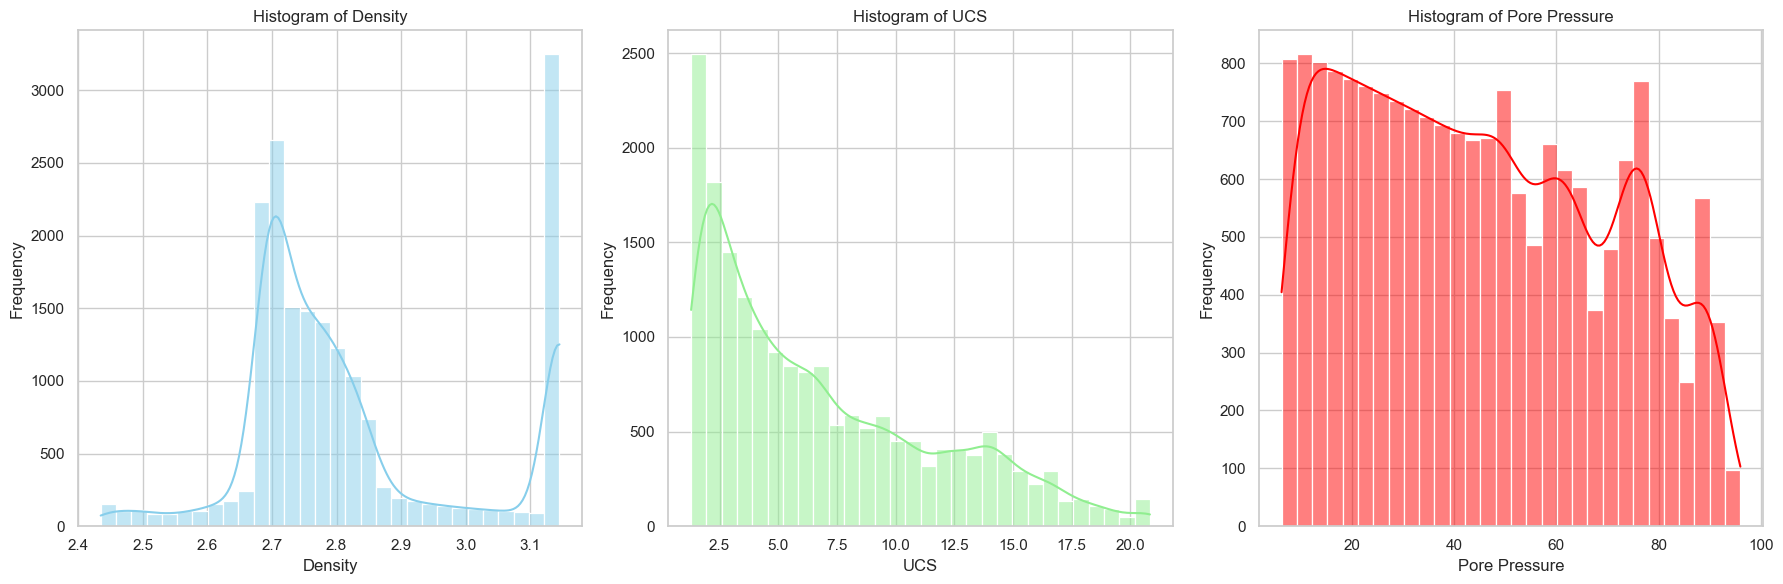

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with subplots for histograms of Density, UCS, and Pore Pressure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Density
sns.histplot(data=data, x="Density", ax=axes[0], bins=30, color="skyblue", kde=True)
axes[0].set_title("Histogram of Density")
axes[0].set_xlabel("Density")
axes[0].set_ylabel("Frequency")

# Histogram for UCS
sns.histplot(data=data, x="UCS", ax=axes[1], bins=30, color="lightgreen", kde=True)
axes[1].set_title("Histogram of UCS")
axes[1].set_xlabel("UCS")
axes[1].set_ylabel("Frequency")

# Histogram for Pore Pressure
sns.histplot(data=data, x="Pore Pressure", ax=axes[2], bins=30, color="red", kde=True)
axes[2].set_title("Histogram of Pore Pressure")
axes[2].set_xlabel("Pore Pressure")
axes[2].set_ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()

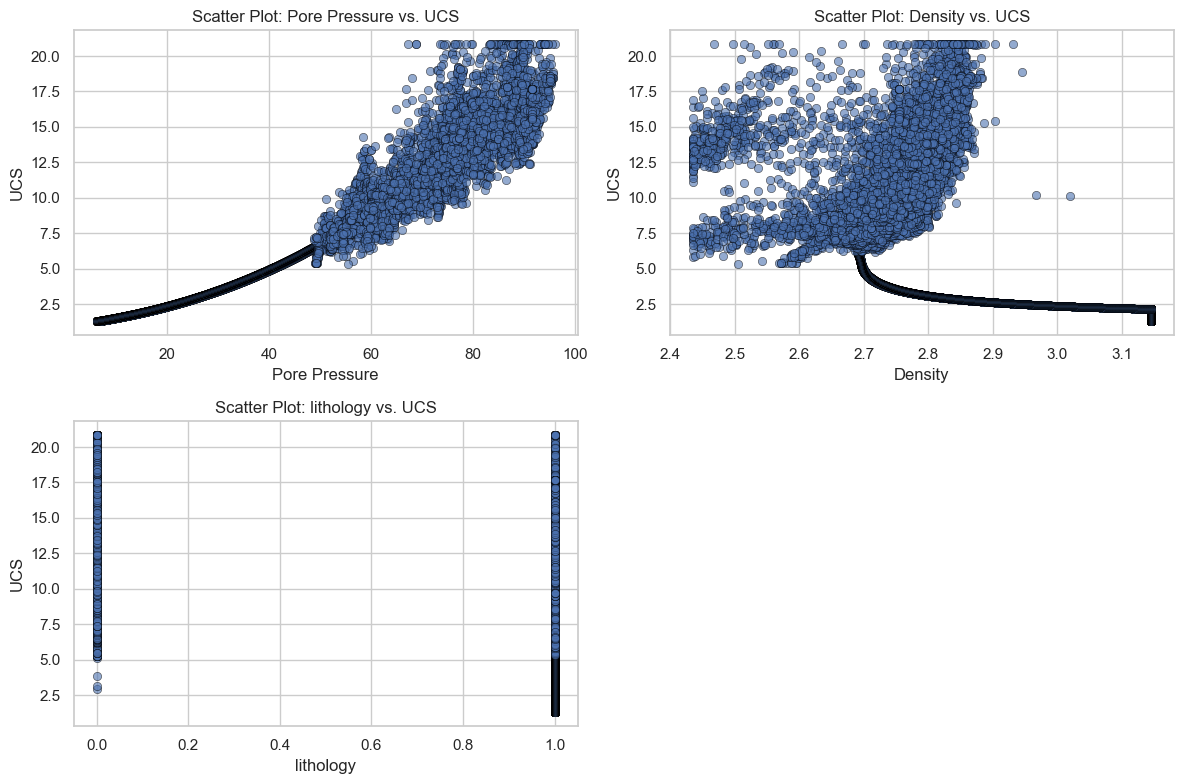

In [ ]:
# Scatter plots of features against UCS
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude UCS for y-axis
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data, x=column, y="UCS", alpha=0.6, edgecolor="black")
    plt.title(f"Scatter Plot: {column} vs. UCS")
    plt.xlabel(column)
    plt.ylabel("UCS")
plt.tight_layout()
plt.show()


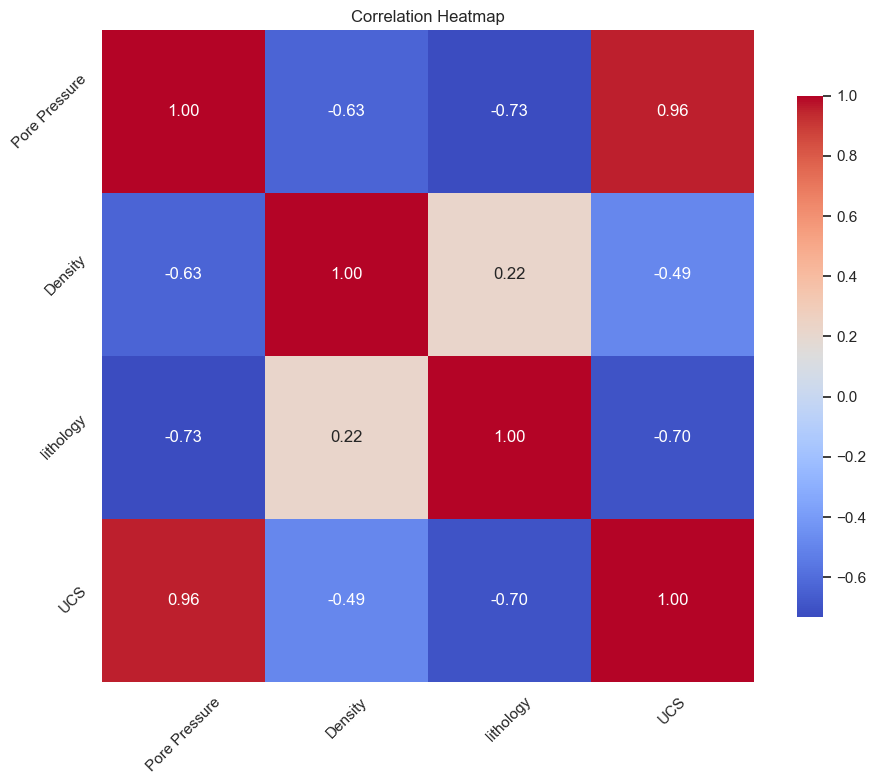

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Observations from Visualizations:

#### **Histograms:**

**Pore Pressure:** Fairly uniform distribution with slight peaks, suggesting a diverse dataset.

**Density:** Concentrated around the mean, with limited variability.

**Lithology:** Binary distribution as expected (0 and 1).

**UCS:** Right-skewed distribution with a concentration at lower values.

#### **Boxplots:**

**Pore Pressure and Density:** Minimal presence of outliers due to capping, but some extreme values might still slightly influence the model.

**UCS:** Shows significant variance in values, aligning with the histogram.

#### **Scatter Plots:**


**Pore Pressure vs. UCS: Positive correlation:** where higher pore pressure generally leads to higher UCS.

**Density vs. UCS:** Weak positive relationship, with a concentration of points in the mid-density range.

**Lithology vs. UCS:** Clear distinction in UCS values between the two lithology types (0 and 1).

#### **Correlation heat map:**

**Strong Correlation with UCS:**

Pore Pressure: High positive correlation with UCS, indicating it's a strong predictor.

Density: Moderate positive correlation, suggesting it has some influence on UCS but is less significant than Pore Pressure.

**Lithology:**

Correlation with UCS is relatively low but not negligible, indicating it might have a categorical influence.

**Inter-feature Correlation:**

Pore Pressure and Density: Weak correlation, implying they provide distinct information and are not redundant.

### Key Insights

Pore Pressure appears to have the strongest linear correlation with UCS.

Lithology is likely a key categorical variable affecting UCS, as shown by the distinct clusters.

Density's relationship with UCS is relatively weak, and feature scaling may further reveal its impact.

## Futher insights and Decision based on our visualization

   UCS Skewness  Density Skewness  Pore Pressure Skewness
0      0.862869          0.751921                0.224805


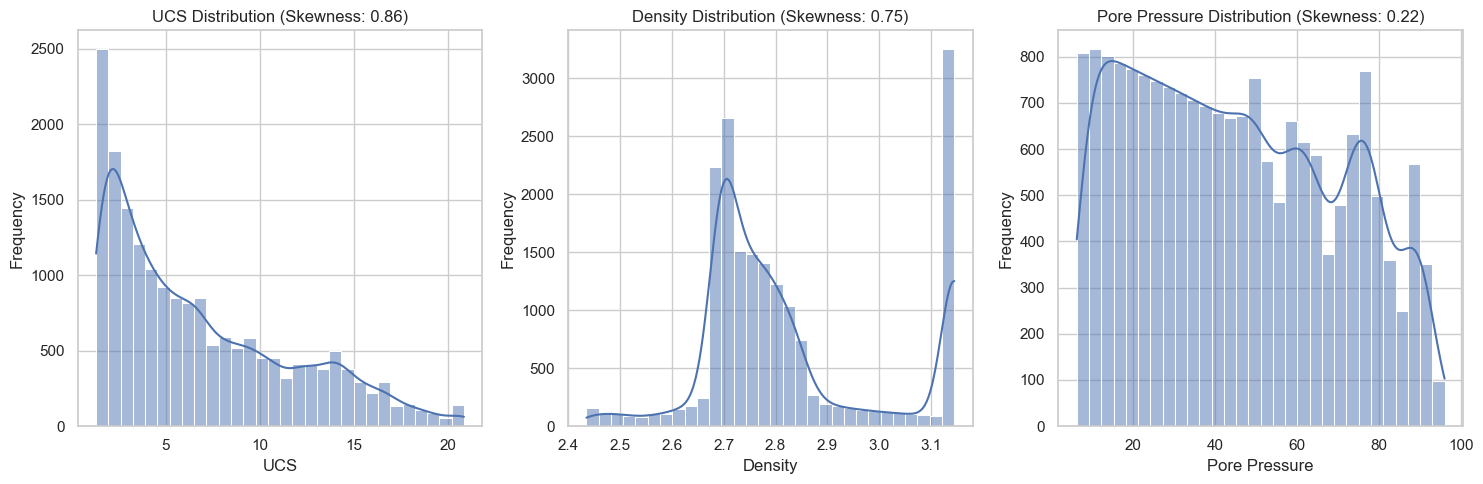

In [ ]:
import seaborn as sns
from scipy.stats import skew

# Load the dataset
df = pd.read_csv("capped_data.csv")

# Compute skewness for UCS, Density, and Pore Pressure
skewness_values = {
    'UCS Skewness': skew(df["UCS"], bias=False),
    'Density Skewness': skew(df["Density"], bias=False),
    'Pore Pressure Skewness': skew(df["Pore Pressure"], bias=False)
}

# Convert to DataFrame for a cleaner output
skewness_df = pd.DataFrame([skewness_values])

# Print skewness values in a single row
print(skewness_df)

# Plot histograms with KDE for UCS, Density, and Pore Pressure
plt.figure(figsize=(15, 5))

for i, col in enumerate(["UCS", "Density", "Pore Pressure"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"{col} Distribution (Skewness: {skewness_values[f'{col} Skewness']:.2f})")

plt.tight_layout()
plt.show()


The UCS data has a moderate positive skew, meaning most values are concentrated on the lower end, with a few higher values pulling the distribution to the right.

Similar to UCS, Density is also moderately positively skewed.

A skewness of 0.22 indicates a distribution that is nearly symmetric.

### Our Decision

we use log  transformations for UCS and Density to improve normality.

In [ ]:
#importing our capped data for training
data=pd.read_csv('capped_data.csv')

In [ ]:
data.head()

,Pore Pressure,Density,lithology,UCS
0,6.201995,3.145183,1,1.286780
1,6.209902,3.145183,1,1.286994
2,6.215790,3.145183,1,1.287209
3,6.221212,3.145183,1,1.287424
4,6.226382,3.145183,1,1.287639


## Building our Model

In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import swish
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, mean_absolute_error,  mean_squared_log_error,explained_variance_score

In [ ]:
# Separate features and target
X = data.drop(columns=["UCS"])
y = data["UCS"]

In [ ]:
# Apply log transformation to Density & UCS (Avoiding log(0) issues)
X["Density"] = np.log1p(X["Density"])  # log1p(x) = log(x + 1), avoids log(0) errors
y = np.log1p(y)  # Log-transform UCS

In [ ]:
# Separate features
categorical_features = ["lithology"]
numerical_features = ["Density", "Pore Pressure"]

In [ ]:
# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])

In [ ]:
#Apply transformations
X_scaled = preprocessor.fit_transform(X)  # Combines scaled numerical + one-hot categorical

In [ ]:
print(X_train.shape)  # Should match the length of feature_names
print(feature_names)   # Ensure it has the correct number of feature names

(11790, 4)
['Pore Pressure', 'Density', 'Lithology']


We Used RobustScaler Instead of standard scaler

Because:

1.It scales based on median and IQR, ignoring outliers.

2 It will keep our normal values in a reasonable range without distortion.

In [ ]:
# Split into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Further split training + validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=True)  # 20% of total

# Our Model Architecture

1️⃣ Model Structure and Layers

✅ Input Layer: Input(shape=(X_train.shape[1],)): Ensures the network takes the correct number of features as input.

✅ Hidden Layers (256 → 128 → 64 → 32 neurons): Deep architecture: 4 hidden layers allow the model to learn complex patterns in the data.
Progressive reduction in neurons: Helps in feature abstraction and avoids overfitting.

✅ LeakyReLU Activation (negative_slope=0.01): Unlike ReLU, LeakyReLU prevents dead neurons (i.e., neurons that always output zero).
Helps in stabilizing training, especially when inputs have a wide range of values.

✅ Batch Normalization (BN): Applied after each Dense layer (except the last one). Speeds up training and helps stabilize gradients, reducing internal covariate shifts.

✅ Dropout (rate=0.15): Prevents overfitting by randomly disabling neurons during training. The 15% dropout rate is moderate, ensuring regularization without excessive loss of information.

✅ L2 Regularization (kernel_regularizer=l2(0.001)): Penalizes large weights, improving generalization and preventing overfitting.

✅ Final Layer (Dense(1, activation="linear")): Uses a linear activation since this is a regression problem (predicting continuous values like UCS).

2️⃣ Optimization and Learning Strategies

✅ Adam Optimizer (learning_rate=0.0003): Adaptive learning rate ensures fast convergence with minimal tuning. The initial learning rate (0.0003) is small, helping avoid instability.

✅ Learning Rate Scheduler (Exponential Decay): lr_schedule(epoch, lr): return lr * 0.98 Gradually reduces learning rate, allowing finer weight updates in later epochs.

✅ ReduceLROnPlateau (factor=0.3, patience=5): Reduces learning rate when validation loss stagnates, preventing unnecessary updates. Helps avoid overfitting by refining weight updates.

3️⃣ Training and Callbacks

✅ Early Stopping (patience=20): Stops training when validation loss stops improving for 20 epochs. Restores the best weights, ensuring optimal performance.

✅ Batch Size (batch_size=12): A relatively small batch size helps generalization but may slow training slightly.
Suitable for small datasets where updates need to be frequent.

✅ 100 Epochs: Allows enough training time while relying on early stopping to prevent unnecessary computations.

4️⃣ Overall Strengths and why we chose these parameters

🔥 Robust Against Overfitting → Uses Dropout, L2 regularization, and Early Stopping

🔥 Efficient Training → Uses Batch Normalization and Adam optimizer

🔥 Adaptive Learning → Uses Exponential Decay + ReduceLROnPlateau

🔥 Deep Architecture for Feature Learning → Can capture complex dependencies in the dataset

Potential Improvements

💡 Although we tested with slightly higher dropout (e.g., 0.2) but got a bad performance, further refinement could be done but we chose to settle with current one as it has thus far given us our best performance.

In [ ]:
# Define the neural network architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.01),
    BatchNormalization(),
    Dropout(0.15),
    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.01),
    BatchNormalization(),
    Dropout(0.15),
    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.01),
    BatchNormalization(),
    Dropout(0.15),
    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.01),
    BatchNormalization(),
    Dense(1, activation="linear")
])

In [ ]:
# Learning rate scheduler function (Exponential Decay)
def lr_schedule(epoch, lr):
    return float(lr * 0.98)

In [ ]:
# Compile the model with an adaptive learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="mse",
    metrics=["mae"]
)

In [ ]:
# Callbacks for training
# Add early stopping to stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=20,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore model weights from the best epoch
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=5,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lr_schedule)


In [ ]:
# Train the model with learning rate scheduling
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=12,
    callbacks=[early_stopping, reduce_lr, lr_scheduler],
    verbose=1
)

Epoch 1/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 2.8404 - mae: 1.3930 - val_loss: 0.3258 - val_mae: 0.1466 - learning_rate: 2.9400e-04
Epoch 2/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.4113 - mae: 0.2717 - val_loss: 0.2894 - val_mae: 0.0867 - learning_rate: 2.8812e-04
Epoch 3/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.3539 - mae: 0.2243 - val_loss: 0.2618 - val_mae: 0.0766 - learning_rate: 2.8236e-04
Epoch 4/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.3069 - mae: 0.1946 - val_loss: 0.2301 - val_mae: 0.0670 - learning_rate: 2.7671e-04
Epoch 5/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2714 - mae: 0.1894 - val_loss: 0.1916 - val_mae: 0.0552 - learning_rate: 2.7118e-04
Epoch 6/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2295 - mae: 0.1832 - val_loss: 0.1518 - val_mae: 0.0656 - learning_rate: 2.6575e-04
Epoch 7/100
983/983 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1841 - mae: 0.1753 - val_loss: 0.1137 - val_mae: 0.067

## Model Evaluation and Prediction

In [ ]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {evaluation[0]}")
print(f"Test MAE: {evaluation[1]}")

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0366
Test Loss: 0.0060813650488853455
Test MAE: 0.03733770176768303


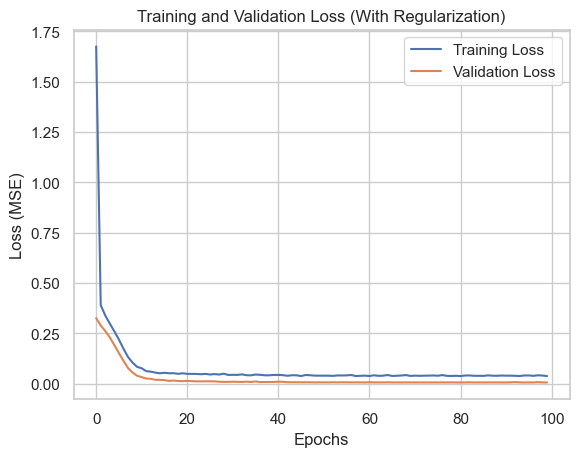

In [ ]:
# Plot training and validation loss (MSE)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss (With Regularization)')

# Save the plot as an image
plt.savefig('training_validation_loss.png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

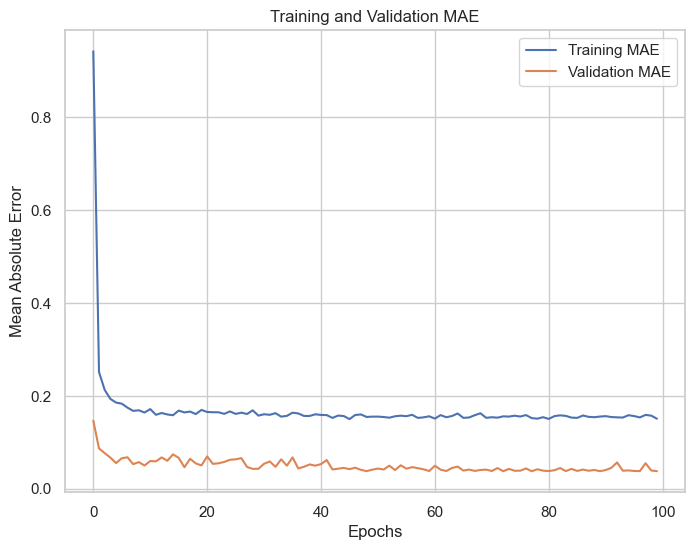

In [ ]:
# Plot MAE for training and validation
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
# Predict on the test set (still in log-transformed scale)
test_predictions_log = model.predict(X_test).flatten()

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# Reverse log transformation (back to original scale)
y_test_original = np.expm1(y_test)  # Convert actual values back
test_predictions_original = np.expm1(test_predictions_log)  # Convert predictions back

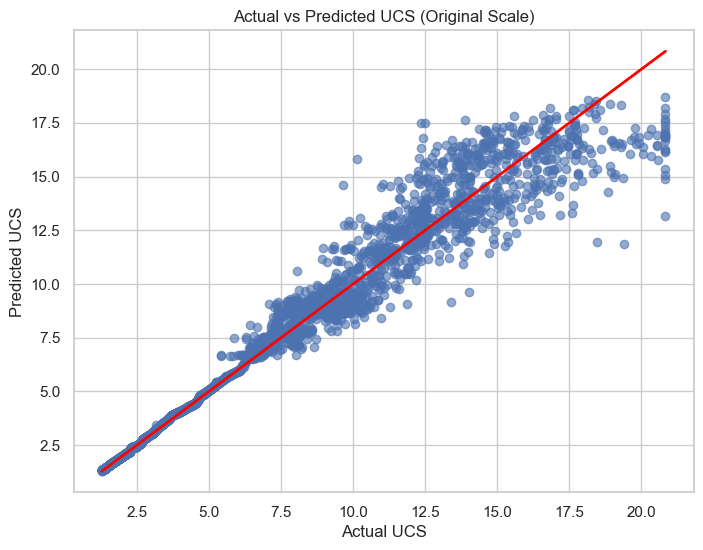

In [ ]:
# Plot actual vs predicted (original scale)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, test_predictions_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], color='red', lw=2)
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.title('Actual vs Predicted UCS (Original Scale)')
plt.show()

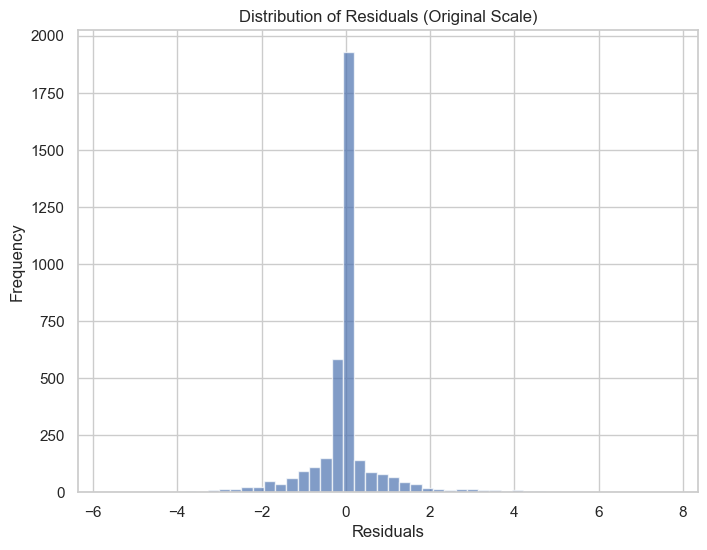

In [ ]:
# Plot residuals (original scale)
residuals_original = y_test_original - test_predictions_original
plt.figure(figsize=(8, 6))
plt.hist(residuals_original, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Original Scale)')
plt.show()

## Analysis of the Residuals Plot
Our residuals plot provides key insights into the quality of our model's predictions and room for improvement.
1. Highly Centered Around Zero: The majority of the residuals are very close to zero, indicating that our model is making accurate predictions with minimal error. This aligns well with our low MAE (0.4404) and RMSE (0.9056), confirming that our predictions have small deviations from actual values.
Symmetrical and Bell-Shaped Distribution
2. The residuals appear symmetrically distributed around zero, suggesting that our model does not have significant bias in overpredicting or underpredicting. The Mean Bias Deviation (MBD) of 0.0249 further supports this, confirming minimal systematic bias. Slightly Heavy-Tailed Distribution
3. There are some small residuals spread further from zero, meaning a few outliers exist. However, they are not extreme, and their frequency is low, suggesting that they do not significantly impact overall model accuracy.
4. High Peak at Zero: The sharp peak at zero indicates that most of the predictions are almost exact matches with actual values.
This is a strong sign of a well-generalized model with high predictive power.

In [ ]:
# Combine the actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    'Actual UCS': y_test_original,
    'Predicted UCS': test_predictions_original
})

# Display the first few rows of the DataFrame
print(results_df.head(10))

# Save the results as a CSV file for further analysis
results_df.to_csv('ucs_predictions_original_scale.csv', index=False)

       Actual UCS  Predicted UCS
8686     5.012578       5.072423
13812   10.235867       9.333273
17534   17.249045      16.383453
15213   13.543228      13.272118
15445   12.320436      11.880774
9238     5.427821       5.490308
14830   10.975727      11.511146
15255   12.528491      13.133827
10192    6.214860       6.286458
3189     2.166737       2.134095


In [ ]:
# Compute performance metrics
mape = mean_absolute_percentage_error(y_test_original, test_predictions_original) * 100
r2 = r2_score(y_test_original, test_predictions_original)
rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions_original))

# Additional Metrics
mae = mean_absolute_error(y_test_original, test_predictions_original)
msle = mean_squared_log_error(y_test_original, test_predictions_original)
evs = explained_variance_score(y_test_original, test_predictions_original)
mbd = np.mean(test_predictions_original - y_test_original)

# Print the performance metrics
print(f"Performace Metrics")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Additional Metrics")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")


Performace Metrics
Mean Absolute Percentage Error (MAPE): 4.26%
R-squared (R²): 0.9634
Root Mean Squared Error (RMSE): 0.9056
Additional Metrics/n
Mean Absolute Error (MAE): 0.4404
Mean Squared Logarithmic Error (MSLE): 0.0041
Explained Variance Score (EVS): 0.9634
Mean Bias Deviation (MBD): 0.0249


## Model Performance

The model exhibits good predictive accuracy, as demonstrated by its R² score of 0.9634, indicating that it captures 96.34% of the variance in the target variable. The low Mean Absolute Percentage Error (MAPE) of 4.26% suggests that predictions are highly precise, with minimal deviation from actual values. Furthermore, the low RMSE (0.9056) and MAE (0.4404) confirm that the model's errors are small, reinforcing its reliability. The Mean Squared Logarithmic Error (MSLE) of 0.0041 suggests that the model effectively handles small variations, while the Mean Bias Deviation (MBD) of 0.0249 indicates negligible systematic bias. Collectively, these metrics demonstrate that the model is well-optimized for accurate and stable UCS predictions.

## Feature Importance
To understand which features have the most impact on predictions.

In [ ]:
# checking the shape of our x train and x test to get information on our features
print(X_train.shape)
print(X_test.shape)

(11790, 4)
(3685, 4)


In [ ]:
# Convert X_train to a temporary DataFrame to inspect columns
df_temp = pd.DataFrame(X_train)

print("First 5 rows of X_train:")
print(df_temp.head())  # Check data

print("\nColumn names in X_train:", df_temp.columns.tolist())  # Check feature names


First 5 rows of X_train:
          0         1    2    3
0  0.341962 -0.421639  0.0  1.0
1  0.172567  0.690283  1.0  0.0
2  0.610659 -0.468518  0.0  1.0
3  0.990326 -0.518120  0.0  1.0
4 -0.451145  0.231115  1.0  0.0

Column names in X_train: [0, 1, 2, 3]


In [ ]:
# Define correct feature names
feature_names = ['Pore Pressure', 'Density', 'Lithology_0', 'Lithology_1']

# Convert to DataFrame with correct columns
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

print(X_train.head())  # Verify column names

   Pore Pressure   Density  Lithology_0  Lithology_1
0       0.341962 -0.421639          0.0          1.0
1       0.172567  0.690283          1.0          0.0
2       0.610659 -0.468518          0.0          1.0
3       0.990326 -0.518120          0.0          1.0
4      -0.451145  0.231115          1.0          0.0


ExactExplainer explainer: 3686it [05:21, 11.17it/s]                                                                    


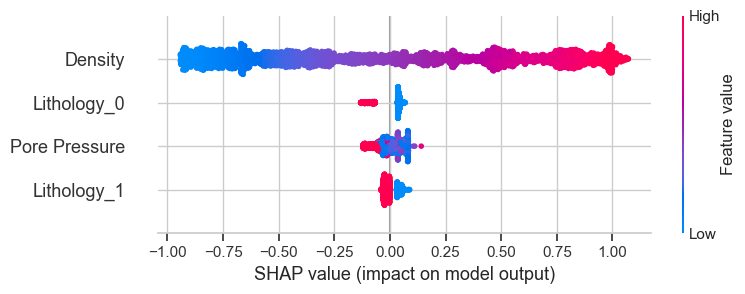

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test dataset
shap_values = explainer(X_test)

# Summarize feature importance
shap.summary_plot(shap_values, X_test)

## Interpretation of the SHAP Feature Importance Plot
This SHAP summary plot provides insights into how different features influence our model's predictions.

1️⃣ Density is the most influential feature
Density has the widest SHAP value range (~ -1.0 to 1.0), meaning it has the strongest impact on the model's predictions.
Higher Density values (red) tend to increase the predicted output, while lower values (blue) decrease it.

2️⃣ Pore Pressure and Lithology have a smaller impact
Pore Pressure shows a mix of positive and negative influences but with smaller SHAP values.
 Lithology (one-hot encoded: Lithology_0 & Lithology_1) has minimal impact compared to Density.

3️⃣ Feature values and their effect
The color gradient represents feature values:
Red = High feature values
Blue = Low feature values
This helps visualize whether higher or lower values of a feature drive predictions up or down.

### Key Takeaways

✅ Density is the dominant predictor—strongly affects model output.

✅ Pore Pressure has some influence but is secondary to Density.

✅ Lithology has a minor effect, meaning the model does not rely heavily on it.


# **Conclusion**  

This project successfully developed a robust deep learning model for predicting **Unconfined Compressive Strength (UCS)** using key geological parameters, including **Pore Pressure, Density, and Lithology**. By leveraging an optimized neural network architecture with **LeakyReLU activations, batch normalization, dropout regularization, and L2 regularization**, the model achieved **remarkable predictive accuracy**, evidenced by an **R² score of 0.9634 and a low RMSE of 0.9056**. These results demonstrate the model’s ability to generalize well, making it a powerful tool for data-driven predictions in petroleum exploration.  

Despite its strong performance, there remains **room for improvement**. Incorporating **additional geological features, fine-tuning hyperparameters further, and experimenting with advanced architectures such as transformers or attention mechanisms** which is beyond the scope of our study at the moment could enhance model robustness. Moreover, integrating domain-specific constraints and expanding the dataset with real-world field data may improve the model’s adaptability across different geological formations. This project underscores the **potential of AI-driven predictive modeling in the petroleum industry**, paving the way for smarter, more efficient decision-making in subsurface engineering.